<img src ='http://img.junkudo.co.jp/book/9784061529083-B-2-L.jpg' width='40%'></img>

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<h3> 1次元の場合 </h3>

In [36]:
x_normal = np.random.randn(1000000,1)
x_abnormal = np.random.randn(1000,1)+4

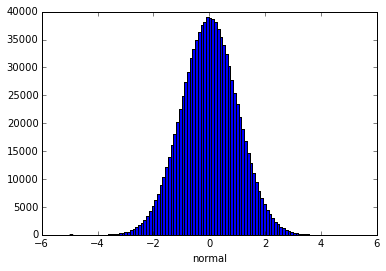

In [37]:
a = plt.hist(x_normal, 100)
plt.xlabel('normal')

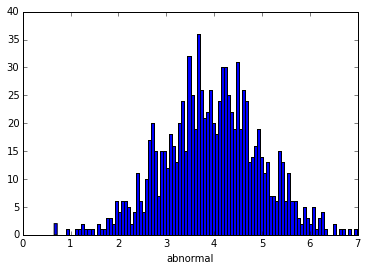

In [38]:
b = plt.hist(x_abnormal, 100)
plt.xlabel('abnormal')

In [39]:
from sklearn import tree
x = np.r_[x_normal, x_abnormal]
y = np.r_[np.zeros(len(x_normal)), np.ones(len(x_abnormal))]

In [54]:
simpleTree = tree.DecisionTreeClassifier(max_depth=1)
simpleTree.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [55]:
tree.export_graphviz(simpleTree, out_file='tree.dot')

In [56]:
print 1-np.sum(np.abs(simpleTree.predict(x)-y))/x.shape[0]

0.999485514486


In [57]:
print float(x_normal.shape[0])/x.shape[0]

0.999000999001


In [58]:
import sklearn.cross_validation as cv

In [59]:
cv_auc = cv.cross_val_score(simpleTree, x, y, 'roc_auc', cv=5)
print cv_auc
print np.mean(cv_auc)

[ 0.8024375  0.8448925  0.8299375  0.7949175  0.8024125]
0.8149195


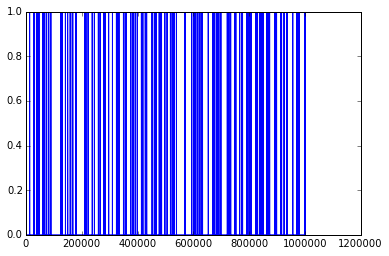

In [46]:
plt.plot(simpleTree.predict(x))

<h3>多次元の場合</h3>

In [47]:
x_normal3D = np.random.randn(1000000,3)
x_abnormal3D = np.c_[np.random.randn(1000,1)+4,np.random.randn(1000,1)+4,np.random.randn(1000,1)+4]

In [48]:
x3D = np.r_[x_normal3D, x_abnormal3D]
y = np.r_[np.zeros(len(x_normal)), np.ones(len(x_abnormal))]

In [60]:
simpleTree = tree.DecisionTreeClassifier(max_depth=3)
simpleTree.fit(x3D, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [61]:
tree.export_graphviz(simpleTree, out_file='tree3D.dot')

0.999901098901
0.9530005625


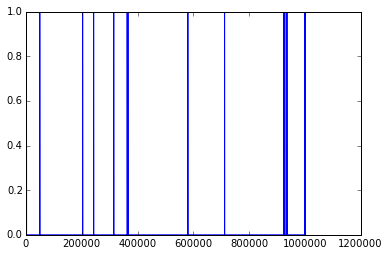

In [62]:
print 1-np.sum(np.abs(simpleTree.predict(x3D)-y))/x.shape[0]
plt.plot(simpleTree.predict(x3D))
print np.mean(cv.cross_val_score(simpleTree, x3D, y, 'roc_auc', cv=5))

<h4>tree 以外の学習機　ナイーブベイズ</h4>

In [63]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

0.999987012987
0.99999991


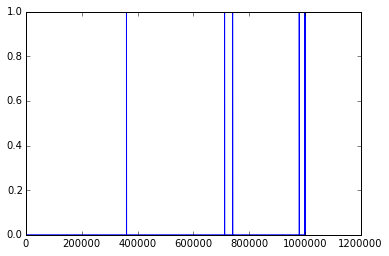

In [64]:
clf.fit(x3D, y)
print 1-np.sum(np.abs(clf.predict(x3D)-y))/x.shape[0]
plt.plot(clf.predict(x3D))
print np.mean(cv.cross_val_score(clf, x3D, y, 'roc_auc', cv=5))

<h5>最近傍法</h5>

In [27]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()

0.999744255744


AttributeError: 'NearestCentroid' object has no attribute 'predict_proba'

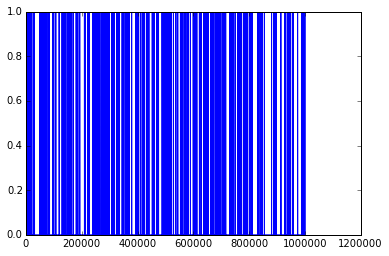

In [28]:
clf.fit(x3D, y)
print 1-np.sum(np.abs(clf.predict(x3D)-y))/x.shape[0]
plt.plot(clf.predict(x3D))
print np.mean(cv.cross_val_score(clf, x3D, y, 'roc_auc', cv=5))

In [32]:
print np.mean(cv.cross_val_score(clf, x3D, y, 'accuracy', cv=5))

0.999992007992


<h5>おまけ</h5>

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(1000)

1.0


KeyboardInterrupt: 

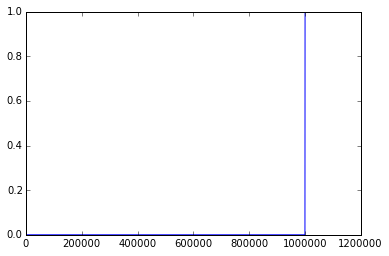

In [34]:
clf.fit(x3D, y)
print 1-np.sum(np.abs(clf.predict(x3D)-y))/x.shape[0]
plt.plot(clf.predict(x3D))
print np.mean(cv.cross_val_score(clf, x3D, y, 'roc_auc', cv=5))